In [2]:
# ==============================================
# K-Means Clustering on California Housing Data
# ==============================================

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files

In [25]:
# ----------------------------------------------
# Step 2: Upload the CSV file
# ----------------------------------------------
print("Please upload your californiahousing.csv file")
uploaded = files.upload()

# Read the uploaded file into a pandas DataFrame
data = pd.read_csv('californiahousing.csv')

# Show first few rows
print("\n Data successfully loaded! Here's what it looks like:")
display(data.head())

Please upload your californiahousing.csv file


Saving californiahousing.csv to californiahousing (1).csv

 Data successfully loaded! Here's what it looks like:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [53]:
# ----------------------------------------------
# 🧹 Step 3.1: Handle missing values
# ----------------------------------------------
print("\nChecking for missing values...")
print(data.isnull().sum())

# Fill missing numeric values with the mean of their column
data = data.fillna(data.mean(numeric_only=True))

print("\nMissing values handled (filled with column means).")


Checking for missing values...
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing values handled (filled with column means).


In [35]:
# ----------------------------------------------
# Step 3.2: Handle categorical data (ocean_proximity)
# ----------------------------------------------
# Convert the 'ocean_proximity' column (text) into numeric form
# using one-hot encoding (it creates separate columns for each category)
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Use the following 2 lines if you want to see 0 and 1 in the DataFrame instead of False/True. Convert only dummy columns to int
dummy_cols = data_encoded.columns[data_encoded.dtypes == 'bool']
data_encoded[dummy_cols] = data_encoded[dummy_cols].astype(int)

# Check dataframe now
data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [36]:
# ----------------------------------------------
# Step 4: Standardize numeric columns (Standardization)
# ----------------------------------------------
# Subtract mean and divide by standard deviation
data_scaled_df = (data_encoded - data_encoded.mean()) / data_encoded.std()

# Check the result
data_scaled_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709,2.129580,-0.681873,-0.015566,2.830673,-0.384457
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181,1.314124,-0.681873,-0.015566,2.830673,-0.384457
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656,1.258663,-0.681873,-0.015566,2.830673,-0.384457
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945,1.165072,-0.681873,-0.015566,2.830673,-0.384457
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881,1.172871,-0.681873,-0.015566,2.830673,-0.384457


In [37]:
# ----------------------------------------------
# Step 5: Split into train and test subsets
# ----------------------------------------------
train_data, test_data = train_test_split(data_scaled_df, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")



Training data shape: (16512, 13)
Testing data shape: (4128, 13)


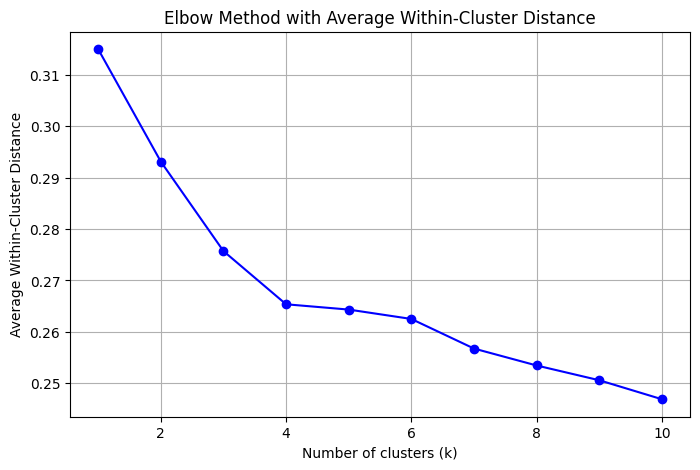

In [41]:
# ----------------------------------------------
# Step 6: Find the optimal number of clusters (Elbow Method)
# ----------------------------------------------
from sklearn.metrics import pairwise_distances

avg_within_distances = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)

    # Compute distances from each point to its cluster center
    distances = pairwise_distances(train_data, kmeans.cluster_centers_[kmeans.labels_])

    # Average distance within clusters
    avg_distance = np.mean(distances)

    # Take reciprocal to make elbow upward-sloping
    avg_within_distances.append(1 / avg_distance)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, avg_within_distances, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Distance')
plt.title('Elbow Method with Average Within-Cluster Distance')
plt.grid(True)
plt.show()

In [19]:
# ----------------------------------------------
# Step 7: Choose optimal k (you can pick from the elbow plot)
# ----------------------------------------------
optimal_k = int(input(" Enter the optimal number of clusters (from the plot): "))

# Train final KMeans model with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(train_data)

 Enter the optimal number of clusters (from the plot): 4


KMeans(n_clusters=4, random_state=42)

In [20]:
# ----------------------------------------------
# Step 8: Test the model on the test dataset
# Evaluate model using silhouette score (ranges between –1 and +1, high values represent good clustering)
# ----------------------------------------------
from sklearn.metrics import silhouette_score

test_clusters = kmeans_final.predict(test_data)

train_silhouette = silhouette_score(train_data, kmeans_final.labels_)
test_silhouette = silhouette_score(test_data, test_clusters)

print("\nModel Evaluation Metrics:")
print(f"Silhouette Score (Train): {train_silhouette:.3f}")
print(f"Silhouette Score (Test):  {test_silhouette:.3f}")


Model Evaluation Metrics:
Silhouette Score (Train): 0.216
Silhouette Score (Test):  0.217


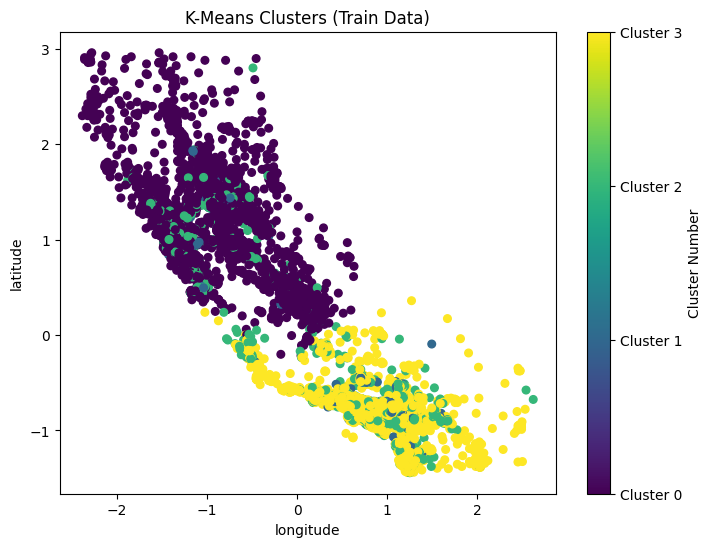

In [44]:
# ----------------------------------------------
# Step 9.1: Visualize clusters of train dataset
# ----------------------------------------------
train_clusters = kmeans_final.predict(train_data)
plt.figure(figsize=(8,6))
scatter = plt.scatter(train_data.iloc[:, 0], train_data.iloc[:, 1], c=train_clusters, cmap='viridis', s=30)
plt.xlabel(train_data.columns[0])
plt.ylabel(train_data.columns[1])
plt.title('K-Means Clusters (Train Data)')

# Create a colorbar / legend showing cluster numbers
cbar = plt.colorbar(scatter, ticks=np.unique(train_clusters))
cbar.set_label('Cluster Number')
cbar.set_ticks(np.unique(train_clusters))
cbar.set_ticklabels([f'Cluster {i}' for i in np.unique(train_clusters)])

plt.show()

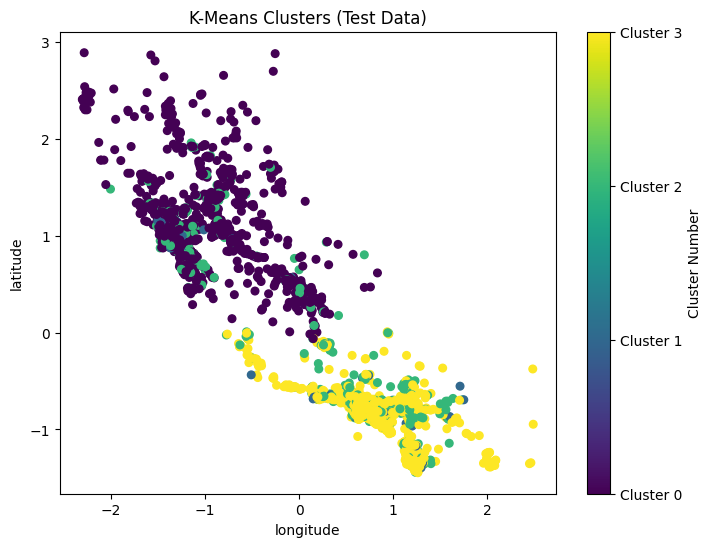

In [45]:
# ----------------------------------------------
# Step 9.2: Visualize clusters of test dataset
# ----------------------------------------------
plt.figure(figsize=(8,6))
scatter = plt.scatter(test_data.iloc[:, 0], test_data.iloc[:, 1], c=test_clusters, cmap='viridis', s=30)
plt.xlabel(test_data.columns[0])
plt.ylabel(test_data.columns[1])
plt.title('K-Means Clusters (Test Data)')

# Create a colorbar / legend showing cluster numbers
cbar = plt.colorbar(scatter, ticks=np.unique(test_clusters))
cbar.set_label('Cluster Number')
cbar.set_ticks(np.unique(test_clusters))
cbar.set_ticklabels([f'Cluster {i}' for i in np.unique(test_clusters)])

plt.show()

In [54]:
# ----------------------------------------------
# Step 10: Add cluster numbers to ORIGINAL data and save to CSV
# ----------------------------------------------

# Make a copy of the original (unscaled) dataset
data_with_clusters = data.copy()

# Predict cluster labels using the trained K-Means model
# Note: We must encode and scale the original data in the same way as training
data_encoded = pd.get_dummies(data_with_clusters, columns=['ocean_proximity'], drop_first=True)

# Standardize numeric columns in the same way as before
data_encoded[numeric_cols] = scaler.transform(data_encoded[numeric_cols])

# Predict cluster labels using the trained model
data_with_clusters['Cluster'] = kmeans_final.predict(data_encoded)

# Split back into train and test subsets (using same indices as before)
train_with_clusters = data_with_clusters.loc[train_data.index]
test_with_clusters = data_with_clusters.loc[test_data.index]

# Save to CSV files
train_with_clusters.to_csv('train_with_clusters.csv', index=False)
test_with_clusters.to_csv('test_with_clusters.csv', index=False)

# Download the files in Google Colab
from google.colab import files
files.download('train_with_clusters.csv')
files.download('test_with_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>